# Problem 1: Optimization and Gradiet Descent

You will find an optimal solution using the gradient descent.

(0) Run the below cell first. These are pre-defined utility functions.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plotHistory(hist):
    plt.figure(figsize=(8, 5))
    for i in range(len(hist)-1):
        plt.arrow(hist[i][0][0], hist[i][1][0], 
                  hist[i+1][0][0]-hist[i][0][0], 
                  hist[i+1][1][0]-hist[i][1][0], alpha=0.3)
        plt.scatter(hist[i][0][0], hist[i][1][0])
    plt.title('Initial (x1, x2): (0.0, 0.0)'); plt.grid('on')
    plt.xlabel('x1'), plt.ylabel('x2'); plt.show()

def update(x):
    pass
    
def train(alpha, n_iter):
    def saveHistory(a, hist=[]):
        if a != '': hist.append(a.tolist())
        return hist

    x =  np.zeros((2, 1)) # inintial value
    saveHistory(x)

    for i in range(n_iter):    
        x = update(x)
        saveHistory(x)

    hist = saveHistory('')
    plotHistory(hist)
    print('(x1, x2) = ({:.3f}, {:.3f})'.format(hist[-1][0][0], hist[-1][1][0]))
    print('f(x1, x2) = {:.3f}'.format((0.5*x.T*H*x + g.T*x + 1).tolist()[0][0]))

Here is the objective function you need to solve.

<img src='figures/HW01/fig_1.png' width="300" height="300">

(a) Find  H  and  g  to transform the objective function into a matrix form as the below. Use np.matrix()

<img src='figures/HW01/fig_2.png' width="300" height="300">

#### *** 위 그림 f 식에서 g 아니고 g.T여야 아래 편미분식 성립 ***

In [3]:
H = np.matrix([[10, -4], [-4, 2]])
g = -np.matrix([[2], [0]])

(b) Define a function to update  x  based on the following eqautions

<img src='figures/HW01/fig_3.png' width="300" height="300">

In [4]:
def update(x):
    global H, g
    new_x = x - alpha*(H*x + g) 
    
    return new_x

(c) Find a learning rate  α  to make it converge within 150 iterations. (round to the 3rd decimal place)

(d) Adjust the traning parameters to obtain the figures as below:

(d-1) Stably converge

<img src='figures/HW01/fig_4.png' width="500" height="500">

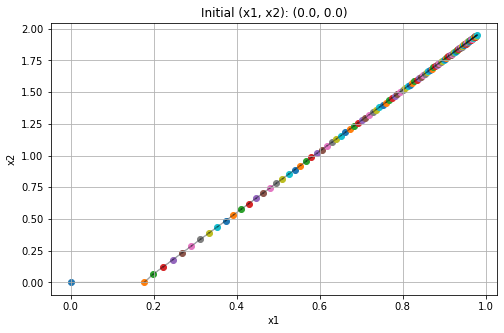

(x1, x2) = (0.979, 1.949)
f(x1, x2) = 0.001


In [5]:
alpha = 0.0885
n_iter = 120

train(alpha, n_iter)

(d-2) Unstably converge

<img src='figures/HW01/fig_5.png' width="500" height="500">

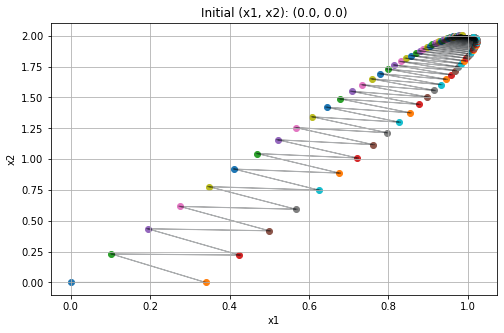

(x1, x2) = (0.986, 2.004)
f(x1, x2) = 0.001


In [6]:
alpha = 0.169855
n_iter = 120

train(alpha, n_iter)

(d-3) Diverge

<img src='figures/HW01/fig_6.png' width="500" height="500">

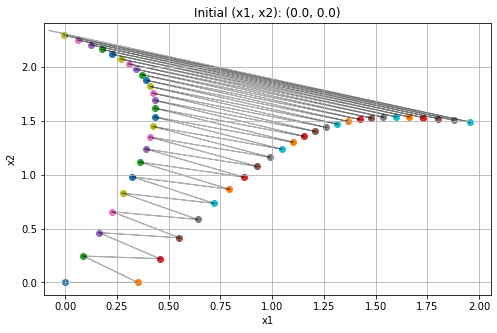

(x1, x2) = (-0.077, 2.337)
f(x1, x2) = 7.362


In [7]:
alpha = 0.175
n_iter = 50

train(alpha, n_iter)

# Problem 2: Optimization and Gradiet Descent with Constraints

You will find an optimal solution using the gradient descent.

<img src='figures/HW01/fig_7.png' width="500" height="500">

In [8]:
df = -np.matrix([[3], [3/2]])
x = np.matrix([[0], [2]])
alpha = 0.0138

lower_bound = np.matrix([[-1], [0]])
upper_bound = np.matrix([[2], [3]])

for i in range(50): 
    x = x - alpha*df
    
    # lb constraints 
    lb_TF = lower_bound < x
    x = x if lb_TF.all() else x + (alpha*0.95)*df
    
    # ub constraints 
    ub_TF = x < upper_bound
    x = x if ub_TF.all() else x + (alpha*0.95)*df
    
print(x)

[[1.99134]
 [2.99567]]


# Problem 3: Image Panorama with Regression

We want to demonstrate an image panorama as an example of linear regression. A panorama is any wide-angle view or representation of a physical space.

<img src='figures/HW01/fig_8.png' width="500" height="500">

%%html
<center><iframe src="https://www.youtube.com/embed/86rnwu3ZFbE?rel=0" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

You need to install opencv module and download the images.

opencv install

https://pypi.python.org/pypi/opencv-python

Image download

https://www.dropbox.com/s/vlmp67zlq4mo0um/HW1.zip?dl=1

In [10]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [11]:
# load images
imag1 = cv2.imread('./figures/HW01/1.jpg')
imag1 = cv2.cvtColor(imag1, cv2.COLOR_BGR2RGB)
imag2 = cv2.imread('./figures/HW01/2.jpg')
imag2 = cv2.cvtColor(imag2, cv2.COLOR_BGR2RGB)
imag3 = cv2.imread('./figures/HW01/3.jpg')
imag3 = cv2.cvtColor(imag3, cv2.COLOR_BGR2RGB)

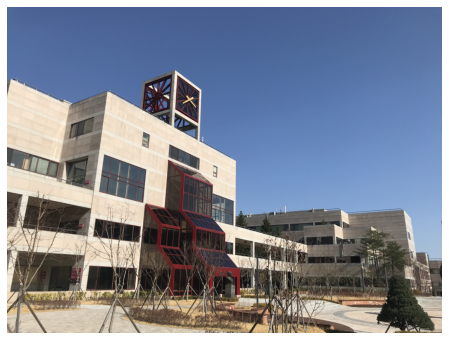

In [12]:
plt.figure(figsize=(10, 6))
plt.imshow(imag1)
plt.axis('off')
plt.show()

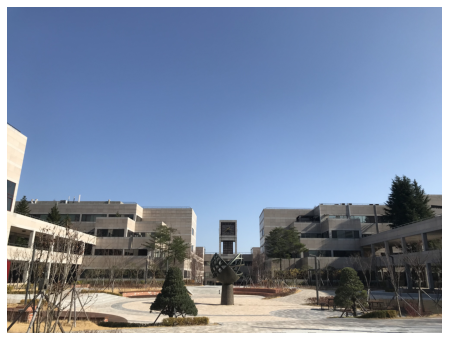

In [13]:
plt.figure(figsize=(10, 6))
plt.imshow(imag2)
plt.axis('off')
plt.show()

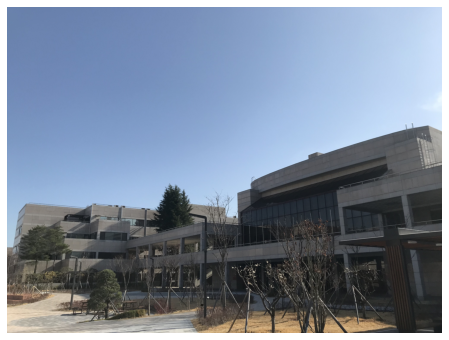

In [14]:
plt.figure(figsize=(10, 6))
plt.imshow(imag3)
plt.axis('off')
plt.show()

Here, we are explaining the basic concept of homography (i.e., perspective transformation).

Any wide-angle view or representation of a physical space

images with horizontally elongated fields of view

idea: projecting images onto a common plane

<img src='figures/HW01/fig_9.png' width="500" height="500">

Camera rotating about its center

<img src='figures/HW01/fig_10.png' width="500" height="500">

Two image planes are related by a homography  H 

Do not worry about a homography transformation. (out of this course's scope)

<img src='figures/HW01/fig_11.png' width="400" height="400">

### Find key points between two images

Suppose these matching points are given.

We have manually found the matching points for you, although there is a technique to do this automatically.

pos1 and pos2 are matching points between img01 and img02

pos3 and pos4 are matching points between img02 and img03

In [15]:
pos1 = np.array([[2121, 2117, 2749, 3095, 3032, 3375, 3677, 3876], 
                 [1431, 2034, 2033, 1885, 2017, 2037, 1885, 2279]], dtype=np.int64)
pos2 = np.array([[188, 58, 828, 1203, 1121, 1437, 1717, 1817], 
                 [1217, 1909, 1952, 1827, 1952, 1991, 1870, 2226]], dtype=np.int64)
pos3 = np.array([[2338, 2379, 2658, 2899, 2977, 3272, 2716, 2786], 
                 [1948, 1874, 2000, 1837, 1964, 1966, 2143, 2317]], dtype=np.int64)
pos4 = np.array([[109, 178, 497, 795, 851, 1144, 534, 580], 
                 [1907, 1828, 1988, 1834, 1971, 1993, 2145, 2333]], dtype=np.int64)

(a) Visualization of key points

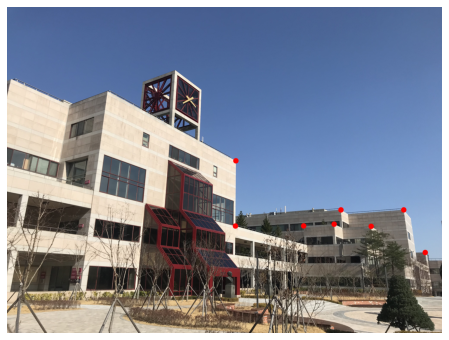

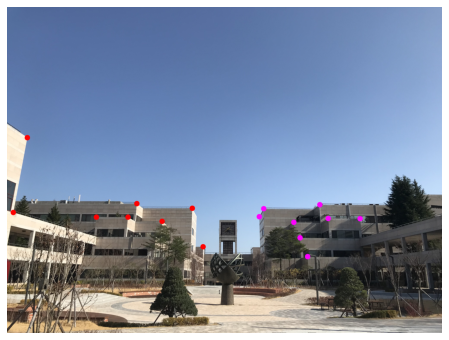

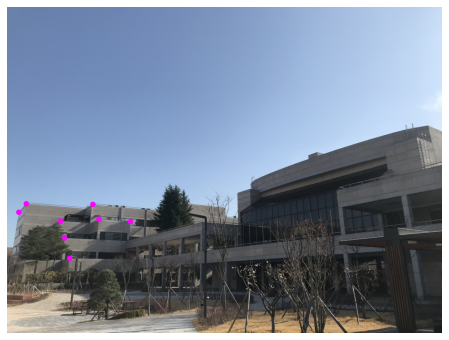

In [16]:
def mark_points(img_1, img_2, pts_1, pts_2, color):
    for i in range(len(pts_1[0])):
        img_1_marked = cv2.circle(img_1, (pts_1[0][i], pts_1[1][i]), 
                                  radius=0, color=color, thickness=50)
        
        img_2_marked = cv2.circle(img_2, (pts_2[0][i], pts_2[1][i]), 
                                  radius=0, color=color, thickness=50)
    
    return img_1_marked, img_2_marked

imag_1_marked, imag_2_marked = mark_points(imag1.copy(), imag2.copy(), pos1, pos2, (255, 0, 0))
imag_2_marked, imag_3_marked = mark_points(imag_2_marked, imag3.copy(), pos3, pos4, (255, 0, 255))

plt.figure(figsize=(10, 6))
plt.imshow(imag_1_marked)
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(imag_2_marked)
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(imag_3_marked)
plt.axis('off')
plt.show()

### Estimation of homography H

<img src='figures/HW01/fig_12.png' width="600" height="800">

<img src='figures/HW01/fig_13.png' width="600" height="800">

(d) Perspective homography for image 1 and image 2

In [17]:
## Construct feature matrix using homography H, and a vector having entries of matching points in image 2 
def get_feature_matrix(pos_1, pos_2):
    feature_matrix = np.zeros((16, 8))
    for i in range(16):
        col = i // 2
        x, y = pos_1[0][col], pos_1[1][col]
        x_prime, y_prime = pos_2[0][col], pos_2[1][col]
        for j in range(8):                
            if (j == 0 and i % 2 == 0) or (j == 3 and i % 2 == 1) or j == 6:
                feature_matrix[i][j] = x

            if (j == 1 and i % 2 == 0) or (j == 4 and i % 2 == 1) or j == 7:
                feature_matrix[i][j] = y

            if (j == 2 and i % 2 == 0) or (j == 5 and i % 2 == 1):
                feature_matrix[i][j] = 1

            if j > 5 and i % 2 == 0:
                feature_matrix[i][j] *= -x_prime

            if j > 5 and i % 2 == 1:
                feature_matrix[i][j] *= -y_prime

    return feature_matrix

pi_1 = get_feature_matrix(pos1, pos2)
b_1 = pos2.T.reshape(-1, 1)

## Define perspective_theta using linear regression
perspective_theta = np.linalg.inv((pi_1.T @ pi_1)) @ pi_1.T @ b_1
perspective_theta = np.append(perspective_theta, np.array([1])).reshape(3, 3)
perspective_theta

array([[ 2.18888204e+00, -3.33029928e-01, -3.86267015e+03],
       [ 7.02730546e-01,  1.81111263e+00, -2.12104743e+03],
       [ 3.02681807e-04, -2.09444635e-05,  1.00000000e+00]])

(e) Perspective homography for image 2 and image 3

In [18]:
## Construct feature matrix using homography H, and a vector having entries of matching points in image 2
pi_2 = get_feature_matrix(pos4, pos3)
b_2 = pos3.T.reshape(-1, 1)

## Define perspective_theta3 using linear regression
perspective_theta3 = np.linalg.inv((pi_2.T @ pi_2)) @ pi_2.T @ b_2
perspective_theta3 = np.append(perspective_theta3, np.array([1])).reshape(3, 3)
perspective_theta3

array([[ 3.85177287e-01,  7.50012437e-02,  2.01455723e+03],
       [-3.21353748e-01,  7.64412044e-01,  4.10184512e+02],
       [-1.38222595e-04, -2.30399672e-05,  1.00000000e+00]])

# Image warping

Again, do not worry about the image warping (outside lecture's scope)

In [19]:
cv2.warpPerspective?

In [20]:
## Apply image warping on image 1 & image 3 using cv2.warpPerspective function 
## do translation to fit the warping image into a size of (18000, 6500) screen. 
translation = np.matrix([[1, 0, 6000],
                         [0, 1, 2500],
                         [0, 0, 1]])

warpedImage = cv2.warpPerspective(imag1, translation*perspective_theta, (18000, 6500))
warpedImage3 = cv2.warpPerspective(imag3, translation*perspective_theta3, (18000, 6500))

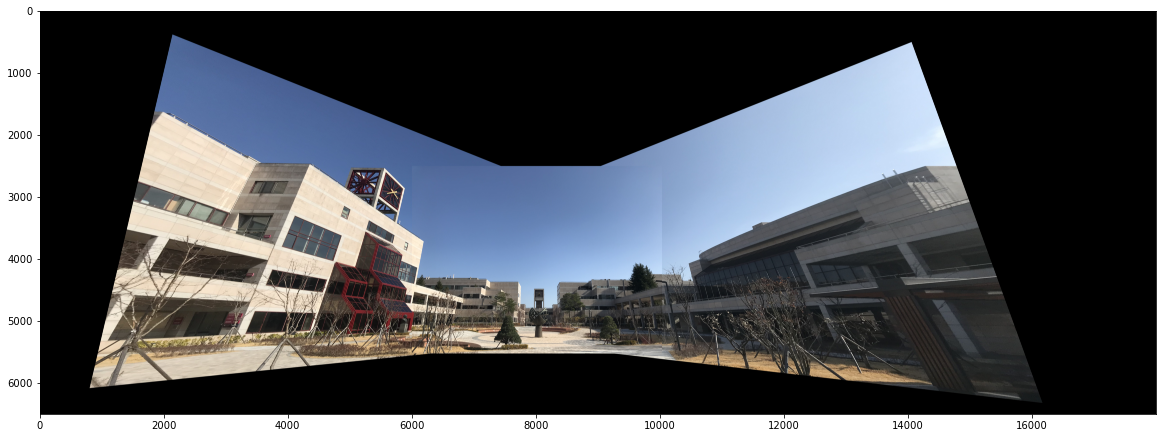

In [21]:
screen = warpedImage.copy()
screen[screen==0] = warpedImage3[screen==0]
screen[2500:3024+2500, 6000:4032+6000] = imag2

## Visualize panorama image
plt.figure(figsize=(20, 12))
plt.imshow(screen)
plt.show()